# 88-Inch Foil Activation Experiment to measure 33MeV Deutron Break-up on Ta neutron Spectrum

This notebook contains the code necessary to generate STAYSL inputs, a description on how to run STAYSL, and the anaysis and plotting of the resulting outputs.  

## BCF

The STASYL BCF input files are generated from the recoded beam current monitor files stores at:

In [1]:
from Support.Utilities import check_path

bcmPath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/BCM/CleanBeam_Trimmed.bcm'
check_path(bcmPath)

The file exists at: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/BCM/CleanBeam_Trimmed.bcm


True

The file used is a modified version of the BCM created file where pre and post calibrations are removed from the file; only the actual irradiation measurements are included.

Support for generating the BCF input files can be found in the [PyScripts Repo](http://github.com/jamesbevins/PyScripts). 

In [2]:
from Unfolding.STAYSL import bcmToBCF

bcfPath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/BCF/flux_history.dat'
bcmToBCF(bcmPath, bcfPath)

The total measurement time was 7866.0 seconds with an integrated measurement of 0.065902847.


The BCF file will be placed at the path indicated above.  The BCF code can be executed by double clicking on the BCF executable and typing in the BCF input file name.

## SHIELD

SHIELD requires a fine group cross section file.  For this, the [14468 group shield cross sections](https://github.com/SlaybaughLab/88_Data/tree/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/SHIELD/shld_xsect.out) were used.

NOTE: SHIELD is only valid/necessary for non-threshold reactions.

The course group structure is specified in the [shldengrp.dat](https://github.com/SlaybaughLab/88_Data/tree/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/SHIELD/shldengrp.dat) file, but this is not required with STAYSL PNNL v 1.2.0.

The [input file](https://github.com/SlaybaughLab/88_Data/tree/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/SHIELD/shldinput.dat) was generated using as measured quantities found in the [foil dimensions spreadsheet](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/BeamOnlyData/BeamFoilDimensions.xlsx).

SHIELD is ran by double clicking the SHIELD executable located in the same directory as the input files.

## SigPhi Calculator

The [SigPhi Calculator](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/SigPhi_Calculator/SigPhi_Calculator_1.2_CleanBeam.xlsm) was filled in with data from the [foil dimensions spreadsheet](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/BeamOnlyData/BeamFoilDimensions.xlsx), [BCF output](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/BCF/flux_history.out), and the [experimental analysis data](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/33MeV_ETA_Activation_Analysis.pdf).

** Note: the activities are in units of Bq/g and were adjusted as such from the calculated $A_0$ values **

## STAYSL_PNNL

The STAYSL_PNNL input file was created from the [SigPhi Calculator](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/SigPhi_Calculator/SigPhi_Calculator_1.2_CleanBeam.xlsm) and [MCNP simulation results]().

Default values for covariance data using Gaussian formalism were used.

The [SHIELD library input file](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/sshldlib.dat) is an appropriately named copy of the [SHIELD ouput file](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/SHIELD/shldinput.out).

The flux normalization factor (TNORM) for the MCNP flux was calculated using the [Beam Calcs spreadsheet](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/ETA_88_BeamCalcs.xlsx) and experimental data.

To get the flux and flux uncertainty data from the MCNP output into STAYSL format:

In [3]:
from GeneralNuclear.MCNP import read_tally
from Unfolding.STAYSL import stayslFlux

simPath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Simulated/Activation/33MeVTa/BeamOnly/Model/33MeVTaBeamOnly_Foil.o'
check_path(simPath)

(tallyFrame,tallyTot, ucertTot) = read_tally(simPath, 214, readGroups=True, splitTally=False)

stayslFlux(tallyFrame, maxBinAdjust=30, adjFlux=5E-9, adjUncert=1.0)

The file exists at: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Simulated/Activation/33MeVTa/BeamOnly/Model/33MeVTaBeamOnly_Foil.o
The flux:
 5.0000e-09 5.9658e-10 3.3105e-09 7.3413e-09 5.5448e-09 3.8396e-09 2.9108e-09 
 2.1463e-09 1.7558e-09 1.1270e-09 7.0451e-10 7.0414e-10 8.1038e-10 1.0522e-09 
 1.1427e-09 1.0875e-09 1.8313e-09 1.2878e-09 8.2658e-10 1.2799e-09 1.8487e-09 
 9.3718e-10 1.8186e-09 1.1280e-09 4.8416e-10 4.9511e-10 5.2916e-10 1.0874e-09 
 1.1649e-09 7.8652e-10 9.0167e-10 1.9005e-09 1.0445e-09 6.0306e-10 5.0935e-10 
 1.3961e-09 9.3846e-10 1.1765e-09 2.1001e-09 1.1833e-09 1.5757e-09 2.6332e-09 
 1.9251e-09 3.9669e-09 5.3677e-09 3.6788e-09 3.0058e-09 8.9772e-09 9.8661e-09 
 1.8694e-08 2.3001e-08 2.4866e-08 2.6623e-08 3.3887e-08 3.8048e-08 4.4267e-08 
 5.1840e-08 3.7116e-08 5.1845e-08 6.1626e-08 8.7745e-08 8.6490e-08 8.9304e-08 
 9.2638e-08 1.0444e-07 1.0667e-07 1.1373e-07 1.0654e-07 1.4164e-07 1.4561e-07 
 3.8050e-07 3.8831e-07 3.7847e-07 3.7171e-07 3.7737e-07 5.77

The STAYSL code is ran by double clicking the executable or running from the command line. 

## Output Analysis

Read the data from the output file using pandas. Convert relative std to absolute.

In [20]:
import pandas as pd

path = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/stayslin.out'
df = pd.read_table(path, engine='python', sep='\s+', skiprows=101, skipfooter=649, header=None,
                   names=['lowE', 'adjFlux', 'unadjFlux', 'fluxRatio', 'adjStd', 
                          'unadjStd', 'uncertRatio', 'integralFlux', 'intFluxUncert'])

df.apply(pd.to_numeric)
df['adjStd'] = df['adjStd'] * df['adjFlux'] / 100
df['unadjStd'] = df['unadjStd'] * df['unadjFlux'] / 100

df

,lowE,adjFlux,unadjFlux,fluxRatio,adjStd,unadjStd,uncertRatio,integralFlux,intFluxUncert
1,1.000000e-10,1.204600e+11,2.255600e+10,5.340,2.426064e+10,2.255600e+10,0.201,325370.000,0.57
2,1.000000e-09,6.490900e+08,2.691200e+08,2.412,3.135105e+07,6.978282e+07,0.186,325260.000,0.57
3,1.000000e-08,2.260200e+09,1.033900e+09,2.186,9.854472e+07,1.876528e+08,0.240,325260.000,0.57
4,2.300000e-08,2.015400e+09,1.103900e+09,1.826,7.174824e+07,1.206563e+08,0.326,325230.000,0.57
5,5.000000e-08,2.139100e+09,8.658400e+08,2.470,1.540152e+08,1.504830e+08,0.415,325170.000,0.57
6,7.600000e-08,8.338200e+08,3.997100e+08,2.086,4.944553e+07,4.728569e+07,0.501,325120.000,0.57
7,1.150000e-07,5.303500e+08,2.148700e+08,2.468,4.661776e+07,3.255280e+07,0.580,325080.000,0.57
8,1.700000e-07,4.482600e+08,1.025200e+08,4.373,9.884133e+07,3.470302e+07,0.651,325060.000,0.57
9,2.550000e-07,2.779200e+08,5.702800e+07,4.873,7.712280e+07,2.216108e+07,0.714,325020.000,0.57
10,3.800000e-07,9.801700e+07,2.691500e+07,3.642,2.049535e+07,7.318188e+06,0.769,324980.000,0.57


Convert to Histograms and plot the adjusted and unadjusted flux.

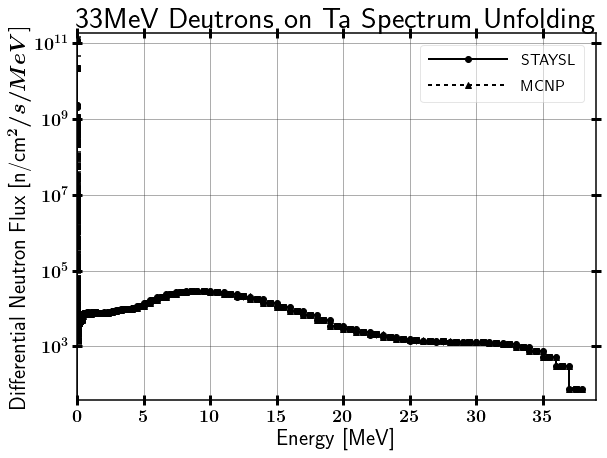

In [21]:
from DataAnalysis.Histograms import Histogram
import matplotlib
%matplotlib inline

outpath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/'

adjDiffHisto = Histogram()
adjDiffHisto.build_histo(df['lowE'].tolist(), df['adjFlux'].tolist(), uncert=df['adjStd'].tolist(),
                     edgeLoc='low', name='STAYSL')

unadjDiffHisto = Histogram()
unadjDiffHisto.build_histo(df['lowE'].tolist(), df['unadjFlux'].tolist(), uncert=df['unadjStd'].tolist(),
                     edgeLoc='low', name='MCNP')

adjDiffHisto.plot(unadjDiffHisto, xMin=1E-6, logX=False, logY=True,
                  title='33MeV Deutrons on Ta Spectrum Unfolding',
                  xLabel='Energy [MeV]', yLabel='Differential Neutron Flux [n/cm^2/s/MeV]',
                  savePath=outpath+'33MeVTa_Staysl-Unfold_Differential')

Convert from differential spectrum and plot.

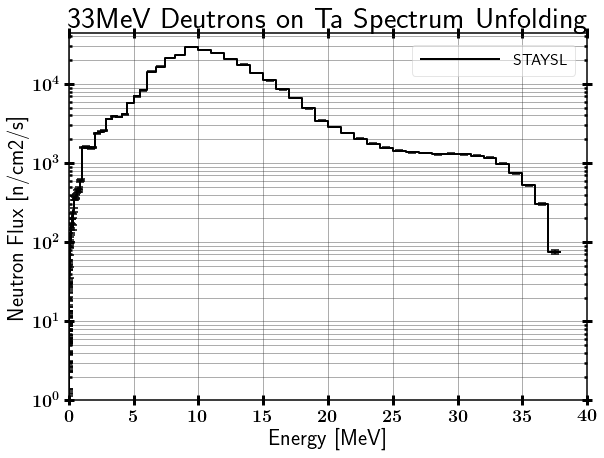

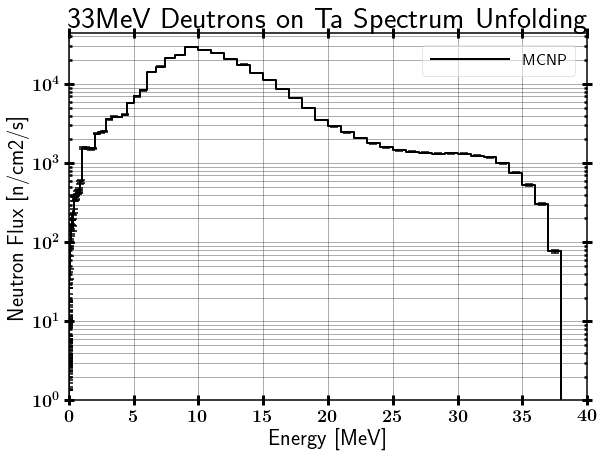

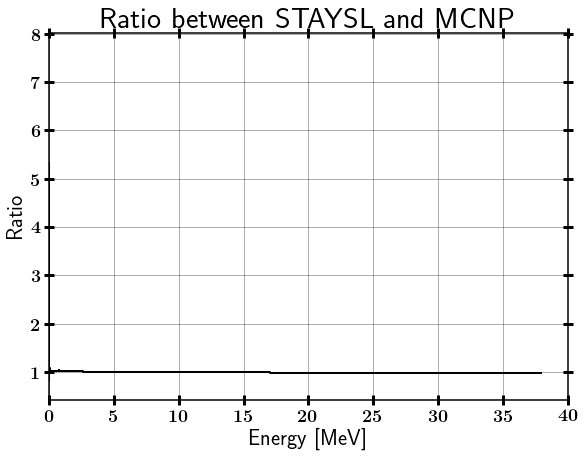

In [22]:
from DataAnalysis.DataManipulation import bin_integration

adjHisto = Histogram()
adjHisto.build_histo(df['lowE'].tolist(),
                     bin_integration(df['lowE'].tolist(), df['adjFlux'].tolist(), 'low'),
                     uncert=bin_integration(df['lowE'].tolist(), df['adjStd'].tolist(), 'low'),
                     edgeLoc='low', name='STAYSL')

adjHisto.plot(xMin=1E-6, xMax=40, yMin=1, logX=False, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]',
              savePath=outpath+'33MeVTa_Staysl-Unfold')

mcnpHisto = Histogram()
normFactor = 4.0600E+9
tallyFrame['normTally'] = tallyFrame['tally'] * normFactor
tallyFrame['normUncertainty'] = tallyFrame['uncertainty'] * tallyFrame['normTally']
mcnpHisto.build_histo(tallyFrame['bin'].tolist(), tallyFrame['normTally'].tolist(), 
                       uncert=tallyFrame['normUncertainty'].tolist(), edgeLoc='up', name='MCNP')
mcnpHisto.plot(xMin=1E-6, xMax=40, yMin=1, logX=False, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]',
              savePath=outpath+'33MeVTa_MCNP')

ratioHisto = Histogram()
ratioHisto.build_histo(df['lowE'].tolist(), df['fluxRatio'].tolist(), edgeLoc='low')
ratioHisto.plot(xMin=1E-6, xMax=40, logX=False, logY=False, includeMarkers=False,
              title='Ratio between STAYSL and MCNP',
              xLabel='Energy [MeV]', yLabel='Ratio',
              savePath=outpath+'33MeVTa_Staysl-MCNP-Ratio')

### Iterative Solution #1:

  - The iterative solution sets the uncertainty below 3 MeV to 100%.
  - It does not update the uncertainty until $\chi^2$ converged.

In [23]:
from Unfolding.STAYSL import IterativeSTAYSL

stayslPath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/Iteration1/'

# Build Data Structure Lists
iterSoln = []
iterAdjHisto = []
iterRatioHisto = []

iterSoln.append(IterativeSTAYSL(stayslPath, updateStd=False, chiConv=0.01))
print iterSoln[-1]

iterSoln[-1].run()

# Add to plot lists
iterAdjHisto.append(Histogram())
iterRatioHisto.append(Histogram())

IterativeSTYASL:
STAYSL Path: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/Iteration1/
$\chi^2$ Convergence: 0.01
Flux Std  Convergence: 0.1
Update Flux Std Each Iteration: False
Number of Energy Groups: 140

The file exists at: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/Iteration1/stayslin.out
Chi^2 = 9.56535, Std Norm = 5.49901775775
Chi^2 = 9.54537
Chi^2 = 9.52608
Chi^2 = 9.50744
Chi^2 = 9.48974
Chi^2 = 9.47266
Chi^2 = 9.45592
Chi^2 = 9.4399
Chi^2 = 9.42422
Chi^2 = 9.40908
Chi^2 = 9.39414
Chi^2 = 9.37971
Chi^2 = 9.36586
Chi^2 = 9.35209
Chi^2 = 9.33877
Chi^2 = 9.32575
Chi^2 = 9.3129
Chi^2 = 9.30054
Chi^2 = 9.28819
Chi^2 = 9.27624
Chi^2 = 9.2647
Chi^2 = 9.25313
Chi^2 = 9.24179
Chi^2 = 9.23083
Chi^2 = 9.2199
Chi^2 = 9.20905
Chi^2 = 9.19821
Chi^2 = 9.18757
Chi^2 = 9.17719
Chi^2 = 9.16692
Chi^2 = 9.15695
Std Norm = 5.40959465025, 5.49798531

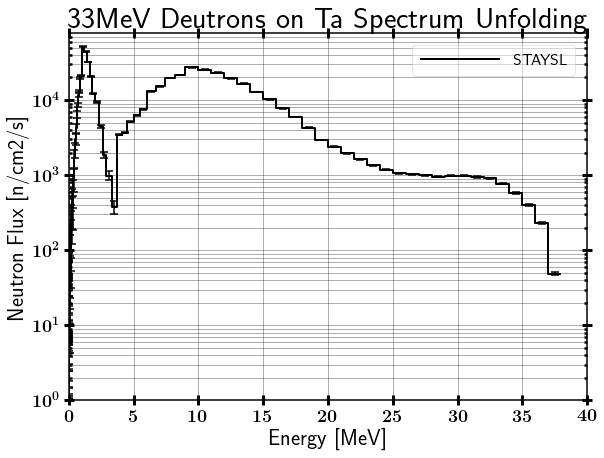

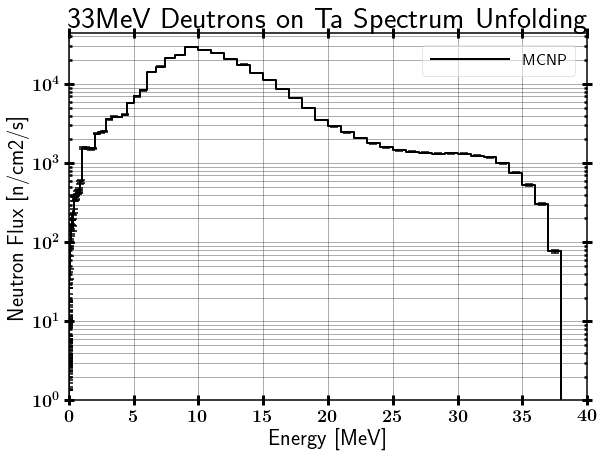

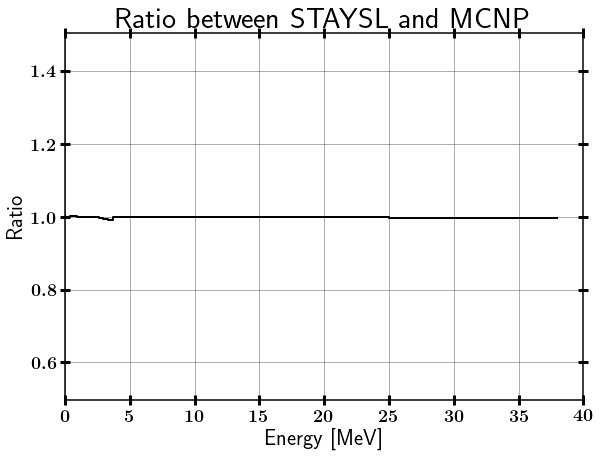

In [24]:
iter = 0

iterAdjHisto[iter].build_histo(iterSoln[iter]._df['lowE'].tolist(),iterSoln[iter]._df['adjFlux'].tolist(),
                             uncert=(iterSoln[iter]._df['adjStd']*iterSoln[iter]._df['adjFlux']).tolist(),
                             edgeLoc='low', name='STAYSL')

iterAdjHisto[iter].plot(xMin=1E-6, xMax=40, yMin=1, logX=False, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]',
              savePath=outpath+'33MeVTa_Staysl-Unfold_Itr{:1d}'.format(iter))

mcnpHisto.plot(xMin=1E-6, xMax=40, yMin=1, logX=False, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]')

iterRatioHisto[iter].build_histo(iterSoln[iter]._df['lowE'].tolist(), iterSoln[iter]._df['fluxRatio'].tolist(), edgeLoc='low')
iterRatioHisto[iter].plot(xMin=1E-6, xMax=40, logX=False, logY=False, includeMarkers=False,
              title='Ratio between STAYSL and MCNP', xLabel='Energy [MeV]', yLabel='Ratio',
              savePath=outpath+'33MeVTa_Staysl-MCNP-Ratio_Itr{:1d}'.format(iter))

### Iterative Solution #2:

  - The iterative solution sets the uncertainty below 3 MeV to 100%.
  - It does update the uncertainty throughout the convergence process.

In [25]:
from Unfolding.STAYSL import IterativeSTAYSL

stayslPath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/Iteration2/'
iterSoln.append(IterativeSTAYSL(stayslPath, updateStd=True, chiConv=0.01))
print iterSoln[-1]

iterSoln[-1].run()

# Add to plot lists
iterAdjHisto.append(Histogram())
iterRatioHisto.append(Histogram())

IterativeSTYASL:
STAYSL Path: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/Iteration2/
$\chi^2$ Convergence: 0.01
Flux Std  Convergence: 0.1
Update Flux Std Each Iteration: True
Number of Energy Groups: 140

The file exists at: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/Iteration2/stayslin.out
Chi^2 = 9.71843, Std Norm = 4.09618739928
Chi^2 = 9.70878
Std Norm = 4.06780191504, 4.08189248389


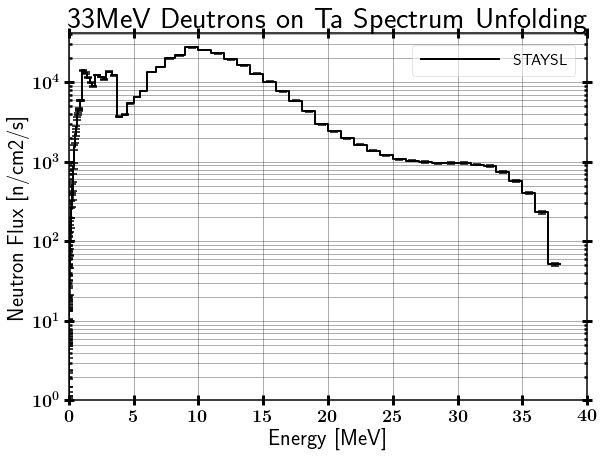

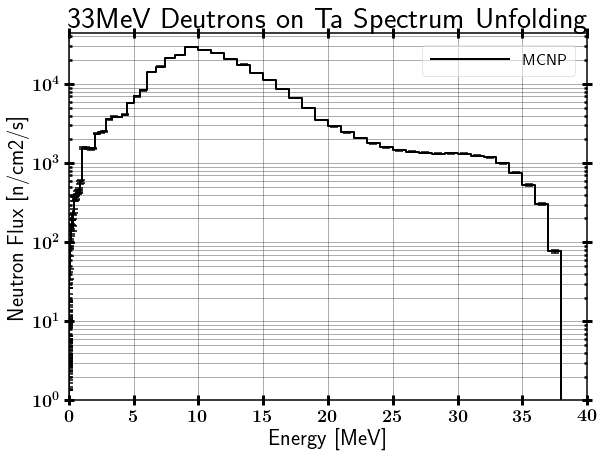

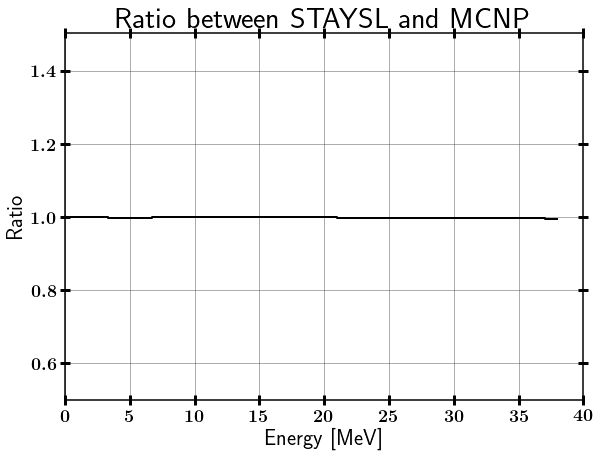

In [26]:
iter = 1

iterAdjHisto[iter].build_histo(iterSoln[iter]._df['lowE'].tolist(),iterSoln[iter]._df['adjFlux'].tolist(),
                             uncert=(iterSoln[iter]._df['adjStd']*iterSoln[iter]._df['adjFlux']).tolist(),
                             edgeLoc='low', name='STAYSL')

iterAdjHisto[iter].plot(xMin=1E-6, xMax=40, yMin=1, logX=False, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]',
              savePath=outpath+'33MeVTa_Staysl-Unfold_Itr{:1d}'.format(iter))

mcnpHisto.plot(xMin=1E-6, xMax=40, yMin=1, logX=False, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]')

iterRatioHisto[iter].build_histo(iterSoln[iter]._df['lowE'].tolist(), iterSoln[iter]._df['fluxRatio'].tolist(), edgeLoc='low')
iterRatioHisto[iter].plot(xMin=1E-6, xMax=40, logX=False, logY=False, includeMarkers=False,
              title='Ratio between STAYSL and MCNP', xLabel='Energy [MeV]', yLabel='Ratio',
              savePath=outpath+'33MeVTa_Staysl-MCNP-Ratio_Itr{:1d}'.format(iter))

### Iterative Solution #3:

  - No modifications are made to the MCNP results for the guess spectrum
  - It does update the uncertainty throughout the convergence process. 

In [11]:
from Unfolding.STAYSL import IterativeSTAYSL

stayslPath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/Iteration3/'
iterSoln.append(IterativeSTAYSL(stayslPath, updateStd=True, chiConv=0.001))
print iterSoln[-1]

iterSoln[-1].run()

# Add to plot lists
iterAdjHisto.append(Histogram())
iterRatioHisto.append(Histogram())

IterativeSTYASL:
STAYSL Path: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/Iteration3/
$\chi^2$ Convergence: 0.001
Flux Std  Convergence: 0.1
Update Flux Std Each Iteration: True
Number of Energy Groups: 140

The file exists at: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/Iteration3/stayslin.out
Chi^2 = 122.07642, Std Norm = 2.00565485316
Chi^2 = 68.08275
Chi^2 = 46.0439
Chi^2 = 38.97375
Chi^2 = 36.64447
Chi^2 = 35.05005
Chi^2 = 33.70886
Chi^2 = 32.50572
Chi^2 = 31.4055
Chi^2 = 30.39348
Chi^2 = 29.46228
Chi^2 = 28.60663
Chi^2 = 27.8202
Chi^2 = 27.09795
Chi^2 = 26.43348
Chi^2 = 25.82297
Chi^2 = 25.26108
Chi^2 = 24.74312
Chi^2 = 24.26452
Chi^2 = 23.82148
Chi^2 = 23.41088
Chi^2 = 23.02859
Chi^2 = 22.67353
Chi^2 = 22.34298
Chi^2 = 22.03323
Chi^2 = 21.74322
Chi^2 = 21.47067
Chi^2 = 21.21292
Chi^2 = 20.96963
Chi^2 = 20.73845
Chi^2 = 20.51921
Chi

Chi^2 = 9.52028
Chi^2 = 9.51279
Chi^2 = 9.50552
Chi^2 = 9.49811
Chi^2 = 9.49087
Chi^2 = 9.48351
Chi^2 = 9.47603
Chi^2 = 9.46868
Chi^2 = 9.4613
Chi^2 = 9.45406
Chi^2 = 9.44682
Chi^2 = 9.43955
Chi^2 = 9.4322
Chi^2 = 9.42496
Chi^2 = 9.41777
Chi^2 = 9.41039
Chi^2 = 9.40315
Chi^2 = 9.39597
Chi^2 = 9.38872
Chi^2 = 9.38155
Chi^2 = 9.3742
Chi^2 = 9.36709
Chi^2 = 9.35983
Chi^2 = 9.35265
Chi^2 = 9.34537
Chi^2 = 9.33818
Chi^2 = 9.33109
Chi^2 = 9.32377
Chi^2 = 9.31663
Chi^2 = 9.30955
Chi^2 = 9.30238
Chi^2 = 9.29514
Chi^2 = 9.28794
Chi^2 = 9.28092
Chi^2 = 9.27374
Chi^2 = 9.2666
Chi^2 = 9.25962
Chi^2 = 9.25248
Chi^2 = 9.24519
Chi^2 = 9.23812
Chi^2 = 9.23104
Chi^2 = 9.22412
Chi^2 = 9.21707
Chi^2 = 9.21009
Chi^2 = 9.20307
Chi^2 = 9.19601
Chi^2 = 9.18896
Chi^2 = 9.18205
Chi^2 = 9.17523
Chi^2 = 9.1684
Chi^2 = 9.16159
Chi^2 = 9.15473
Chi^2 = 9.14796
Chi^2 = 9.14119
Chi^2 = 9.1344
Chi^2 = 9.1275
Chi^2 = 9.1208
Chi^2 = 9.11393
Chi^2 = 9.10716
Chi^2 = 9.10049
Chi^2 = 9.09362
Chi^2 = 9.08676
Chi^2 = 9.07996


Chi^2 = 6.71844
Chi^2 = 6.71445
Chi^2 = 6.71051
Chi^2 = 6.70653
Chi^2 = 6.70279
Chi^2 = 6.69898
Chi^2 = 6.69497
Chi^2 = 6.69101
Chi^2 = 6.68697
Chi^2 = 6.68302
Chi^2 = 6.67906
Chi^2 = 6.67525
Chi^2 = 6.67125
Chi^2 = 6.66735
Chi^2 = 6.6634
Chi^2 = 6.6596
Chi^2 = 6.65585
Chi^2 = 6.65186
Chi^2 = 6.64793
Chi^2 = 6.64405
Chi^2 = 6.64028
Chi^2 = 6.63654
Chi^2 = 6.63255
Chi^2 = 6.62858
Chi^2 = 6.62473
Chi^2 = 6.62097
Chi^2 = 6.61724
Chi^2 = 6.61351
Chi^2 = 6.60955
Chi^2 = 6.6057
Chi^2 = 6.60174
Chi^2 = 6.59795
Chi^2 = 6.59424
Chi^2 = 6.59047
Chi^2 = 6.5865
Chi^2 = 6.5827
Chi^2 = 6.57885
Chi^2 = 6.57514
Chi^2 = 6.5714
Chi^2 = 6.56768
Chi^2 = 6.56389
Chi^2 = 6.56024
Chi^2 = 6.55656
Chi^2 = 6.5528
Chi^2 = 6.54905
Chi^2 = 6.5452
Chi^2 = 6.54136
Chi^2 = 6.53765
Chi^2 = 6.53397
Chi^2 = 6.53025
Chi^2 = 6.52656
Chi^2 = 6.52272
Chi^2 = 6.51892
Chi^2 = 6.51512
Chi^2 = 6.51147
Chi^2 = 6.50781
Chi^2 = 6.50418
Chi^2 = 6.50051
Chi^2 = 6.49691
Chi^2 = 6.49322
Chi^2 = 6.48951
Chi^2 = 6.48584
Chi^2 = 6.48217


Chi^2 = 5.14326
Chi^2 = 5.14102
Chi^2 = 5.13874
Chi^2 = 5.13649
Chi^2 = 5.13414
Chi^2 = 5.13181
Chi^2 = 5.12949
Chi^2 = 5.1272
Chi^2 = 5.12482
Chi^2 = 5.12253
Chi^2 = 5.12028
Chi^2 = 5.11804
Chi^2 = 5.11576
Chi^2 = 5.11348
Chi^2 = 5.11122
Chi^2 = 5.10885
Chi^2 = 5.10662
Chi^2 = 5.10433
Chi^2 = 5.10204
Chi^2 = 5.09978
Chi^2 = 5.09757
Chi^2 = 5.09535
Chi^2 = 5.09314
Chi^2 = 5.09084
Chi^2 = 5.08857
Chi^2 = 5.08631
Chi^2 = 5.084
Chi^2 = 5.08173
Chi^2 = 5.07952
Chi^2 = 5.07732
Chi^2 = 5.07514
Chi^2 = 5.07293
Chi^2 = 5.07068
Chi^2 = 5.06846
Chi^2 = 5.06619
Chi^2 = 5.06394
Chi^2 = 5.06172
Chi^2 = 5.05945
Chi^2 = 5.05724
Chi^2 = 5.05505
Chi^2 = 5.05286
Chi^2 = 5.05061
Chi^2 = 5.04837
Chi^2 = 5.04611
Chi^2 = 5.04393
Chi^2 = 5.0417
Chi^2 = 5.03946
Chi^2 = 5.03726
Chi^2 = 5.03509
Chi^2 = 5.03291
Chi^2 = 5.03072
Chi^2 = 5.02854
Chi^2 = 5.02631
Chi^2 = 5.0241
Chi^2 = 5.02187
Chi^2 = 5.01975
Chi^2 = 5.01747
Chi^2 = 5.0153
Chi^2 = 5.01313
Chi^2 = 5.01097
Chi^2 = 5.00876
Chi^2 = 5.00658
Chi^2 = 5.0043

Chi^2 = 4.18067
Chi^2 = 4.17921
Chi^2 = 4.17774
Chi^2 = 4.1763
Chi^2 = 4.17477
Chi^2 = 4.17324
Chi^2 = 4.17174
Chi^2 = 4.17018
Chi^2 = 4.1687
Chi^2 = 4.16717
Chi^2 = 4.16573
Chi^2 = 4.16421
Chi^2 = 4.1627
Chi^2 = 4.16115
Chi^2 = 4.15968
Chi^2 = 4.1582
Chi^2 = 4.1568
Chi^2 = 4.15538
Chi^2 = 4.15398
Chi^2 = 4.15261
Chi^2 = 4.1512
Chi^2 = 4.1497
Chi^2 = 4.1482
Chi^2 = 4.14668
Chi^2 = 4.14516
Chi^2 = 4.14371
Chi^2 = 4.1423
Chi^2 = 4.14085
Chi^2 = 4.13941
Chi^2 = 4.13793
Chi^2 = 4.13642
Chi^2 = 4.1349
Chi^2 = 4.1334
Chi^2 = 4.132
Chi^2 = 4.13056
Chi^2 = 4.12908
Chi^2 = 4.12754
Chi^2 = 4.12604
Chi^2 = 4.12449
Chi^2 = 4.12298
Chi^2 = 4.12159
Chi^2 = 4.12014
Chi^2 = 4.1187
Chi^2 = 4.11724
Chi^2 = 4.11573
Chi^2 = 4.11428
Chi^2 = 4.11281
Chi^2 = 4.1114
Chi^2 = 4.10993
Chi^2 = 4.10843
Chi^2 = 4.10695
Chi^2 = 4.10552
Chi^2 = 4.1041
Chi^2 = 4.10263
Chi^2 = 4.10116
Chi^2 = 4.09972
Chi^2 = 4.09825
Chi^2 = 4.09679
Chi^2 = 4.09536
Chi^2 = 4.09395
Chi^2 = 4.09249
Chi^2 = 4.09107
Chi^2 = 4.08974
Chi^2 = 

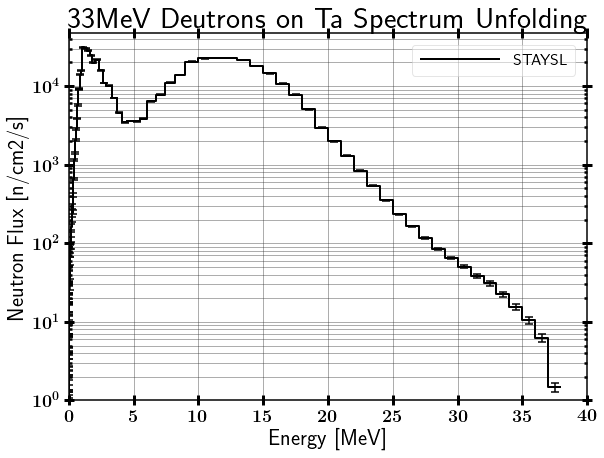

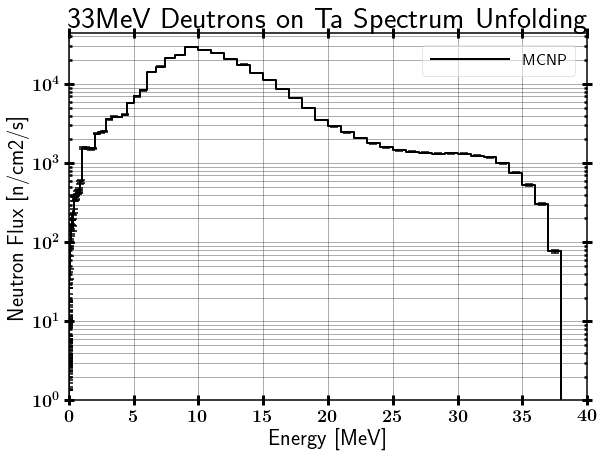

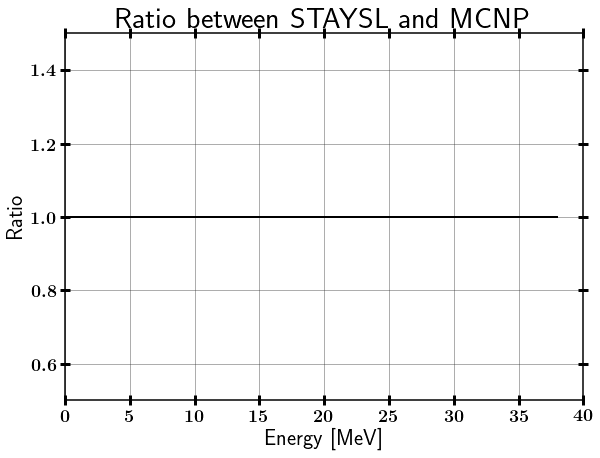

In [12]:
iter = 2

iterAdjHisto[iter].build_histo(iterSoln[iter]._df['lowE'].tolist(),iterSoln[iter]._df['adjFlux'].tolist(),
                             uncert=(iterSoln[iter]._df['adjStd']*iterSoln[iter]._df['adjFlux']).tolist(),
                             edgeLoc='low', name='STAYSL')

iterAdjHisto[iter].plot(xMin=1E-6, xMax=40, yMin=1, logX=False, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]',
              savePath=outpath+'33MeVTa_Staysl-Unfold_Itr{:1d}'.format(iter))

mcnpHisto.plot(xMin=1E-6, xMax=40, yMin=1, logX=False, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]')

iterRatioHisto[iter].build_histo(iterSoln[iter]._df['lowE'].tolist(), iterSoln[iter]._df['fluxRatio'].tolist(), edgeLoc='low')
iterRatioHisto[iter].plot(xMin=1E-6, xMax=40, logX=False, logY=False, includeMarkers=False,
              title='Ratio between STAYSL and MCNP', xLabel='Energy [MeV]', yLabel='Ratio',
              savePath=outpath+'33MeVTa_Staysl-MCNP-Ratio_Itr{:1d}'.format(iter))

#### Create MCNP Input Source

Using this unfold, create the MCNP input source spectrum.

In [13]:
from GeneralNuclear.MCNP import listToMCNPTable

print "E bins: remove first and add last upper to convert from lower edges to upper edges."
listToMCNPTable(iterSoln[iter]._df['lowE'].tolist())
print "Source"
listToMCNPTable(iterSoln[iter]._df['adjFlux'].tolist())
print "Neutron Intensity: {:.2e}".format(sum(iterSoln[iter]._df['adjFlux']))

E bins: remove first and add last upper to convert from lower edges to upper edges.
    
     1.0000e-10 1.0000e-09 1.0000e-08 2.3000e-08 5.0000e-08 7.6000e-08
     1.1500e-07 1.7000e-07 2.5500e-07 3.8000e-07 5.5000e-07 8.4000e-07
     1.2750e-06 1.9000e-06 2.8000e-06 4.2500e-06 6.3000e-06 9.2000e-06
     1.3500e-05 2.1000e-05 3.0000e-05 4.5000e-05 6.9000e-05 1.0000e-04
     1.3500e-04 1.7000e-04 2.2000e-04 2.8000e-04 3.6000e-04 4.5000e-04
     5.7500e-04 7.6000e-04 9.6000e-04 1.2750e-03 1.6000e-03 2.0000e-03
     2.7000e-03 3.4000e-03 4.5000e-03 5.5000e-03 7.2000e-03 9.2000e-03
     1.2000e-02 1.5000e-02 1.9000e-02 2.5500e-02 3.2000e-02 4.0000e-02
     5.2500e-02 6.6000e-02 8.8000e-02 1.1000e-01 1.3500e-01 1.6000e-01
     1.9000e-01 2.2000e-01 2.5500e-01 2.9000e-01 3.2000e-01 3.6000e-01
     4.0000e-01 4.5000e-01 5.0000e-01 5.5000e-01 6.0000e-01 6.6000e-01
     7.2000e-01 7.8000e-01 8.4000e-01 9.2000e-01 1.0000e+00 1.2000e+00
     1.4000e+00 1.6000e+00 1.8000e+00 2.0000e+00 2.3000e+00

### Iterative Solution #4:

  - The iterative solution sets the uncertainty for all bins to 100% and sets a unform 1E-7 flux per src.  
  - It does update the uncertainty throughout the convergence process. 

In [14]:
from Unfolding.STAYSL import IterativeSTAYSL

stayslPath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/Iteration4/'
iterSoln.append(IterativeSTAYSL(stayslPath, updateStd=True, chiConv=0.01))
print iterSoln[-1]

iterSoln[-1].run()

# Add to plot lists
iterAdjHisto.append(Histogram())
iterRatioHisto.append(Histogram())

IterativeSTYASL:
STAYSL Path: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/Iteration4/
$\chi^2$ Convergence: 0.01
Flux Std  Convergence: 0.1
Update Flux Std Each Iteration: True
Number of Energy Groups: 140

The file exists at: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/Iteration4/stayslin.out
Chi^2 = 271.34018, Std Norm = 9.49057226251
Chi^2 = 9.14236
Chi^2 = 4.95566
Chi^2 = 4.7141
Chi^2 = 4.66425
Chi^2 = 4.6364
Chi^2 = 4.61638
Chi^2 = 4.60044
Chi^2 = 4.58669
Chi^2 = 4.57448
Chi^2 = 4.56367
Chi^2 = 4.55377
Std Norm = 5.18108162356, 5.2579647108


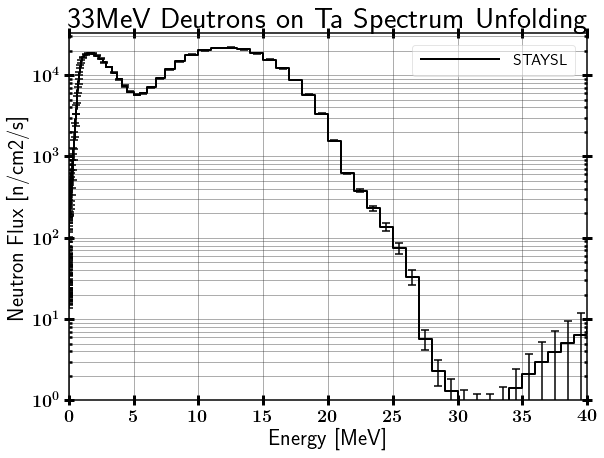

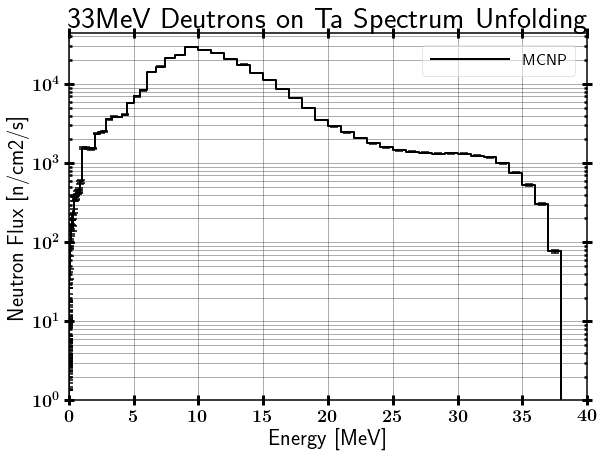

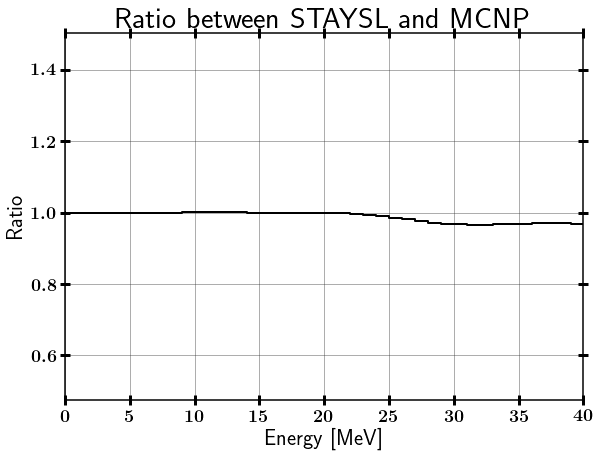

In [15]:
iter = 3

iterAdjHisto[iter].build_histo(iterSoln[iter]._df['lowE'].tolist(),iterSoln[iter]._df['adjFlux'].tolist(),
                             uncert=(iterSoln[iter]._df['adjStd']*iterSoln[iter]._df['adjFlux']).tolist(),
                             edgeLoc='low', name='STAYSL')

iterAdjHisto[iter].plot(xMin=1E-6, xMax=40, yMin=1, logX=False, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]',
              savePath=outpath+'33MeVTa_Staysl-Unfold_Itr{:1d}'.format(iter))

mcnpHisto.plot(xMin=1E-6, xMax=40, yMin=1, logX=False, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]')

iterRatioHisto[iter].build_histo(iterSoln[iter]._df['lowE'].tolist(), iterSoln[iter]._df['fluxRatio'].tolist(), edgeLoc='low')
iterRatioHisto[iter].plot(xMin=1E-6, xMax=40, logX=False, logY=False, includeMarkers=False,
              title='Ratio between STAYSL and MCNP', xLabel='Energy [MeV]', yLabel='Ratio',
              savePath=outpath+'33MeVTa_Staysl-MCNP-Ratio_Itr{:1d}'.format(iter))

### Iterative Solution #5:

  - This solution sets the uncertainty to 100 % for all bins. 
  - The iterative solution uses the MCNP spectrum and sets a nominal 5E-9 flux per src for zero flux bins.  
  - It does update the uncertainty throughout the convergence process. 

In [16]:
from Unfolding.STAYSL import IterativeSTAYSL

stayslPath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/Iteration5/'
iterSoln.append(IterativeSTAYSL(stayslPath, updateStd=True, chiConv=0.01))
print iterSoln[-1]

iterSoln[-1].run()

# Add to plot lists
iterAdjHisto.append(Histogram())
iterRatioHisto.append(Histogram())

IterativeSTYASL:
STAYSL Path: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/Iteration5/
$\chi^2$ Convergence: 0.01
Flux Std  Convergence: 0.1
Update Flux Std Each Iteration: True
Number of Energy Groups: 140

The file exists at: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/Iteration5/stayslin.out
Chi^2 = 18.14444, Std Norm = 9.51068861072
Chi^2 = 5.70852
Chi^2 = 4.83415
Chi^2 = 4.73421
Chi^2 = 4.69425
Chi^2 = 4.66906
Chi^2 = 4.65008
Chi^2 = 4.63445
Chi^2 = 4.62118
Chi^2 = 4.60969
Chi^2 = 4.59934
Chi^2 = 4.59005
Std Norm = 7.27577218926, 7.33268679203


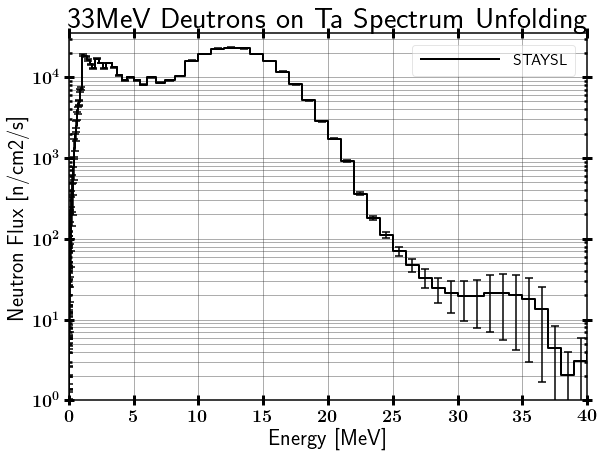

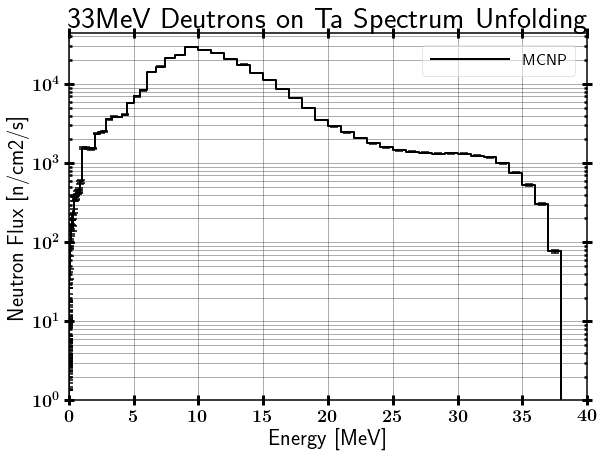

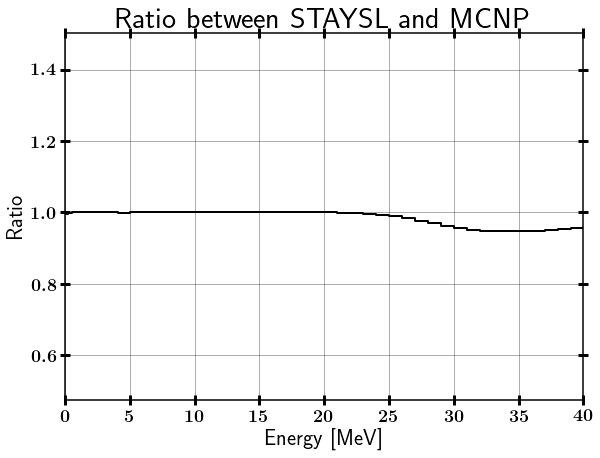

In [17]:
iter = 4

iterAdjHisto[iter].build_histo(iterSoln[iter]._df['lowE'].tolist(),iterSoln[iter]._df['adjFlux'].tolist(),
                             uncert=(iterSoln[iter]._df['adjStd']*iterSoln[iter]._df['adjFlux']).tolist(),
                             edgeLoc='low', name='STAYSL')

iterAdjHisto[iter].plot(xMin=1E-6, xMax=40, yMin=1, logX=False, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]',
              savePath=outpath+'33MeVTa_Staysl-Unfold_Itr{:1d}'.format(iter))

mcnpHisto.plot(xMin=1E-6, xMax=40, yMin=1, logX=False, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]')

iterRatioHisto[iter].build_histo(iterSoln[iter]._df['lowE'].tolist(), iterSoln[iter]._df['fluxRatio'].tolist(), edgeLoc='low')
iterRatioHisto[iter].plot(xMin=1E-6, xMax=40, logX=False, logY=False, includeMarkers=False,
              title='Ratio between STAYSL and MCNP', xLabel='Energy [MeV]', yLabel='Ratio',
              savePath=outpath+'33MeVTa_Staysl-MCNP-Ratio_Itr{:1d}'.format(iter))

### Iterative Solution #6:

  - This solution sets the uncertainty to 100 % for all bins up to 38 MeV. 
  - The iterative solution uses the MCNP spectrum and sets a nominal 5E-9 flux per src for zero flux bins.  
  - It does update the uncertainty throughout the convergence process. 

In [18]:
from Unfolding.STAYSL import IterativeSTAYSL

stayslPath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/Iteration6/'
iterSoln.append(IterativeSTAYSL(stayslPath, updateStd=True, chiConv=0.01))
print iterSoln[-1]

iterSoln[-1].run()

# Add to plot lists
iterAdjHisto.append(Histogram())
iterRatioHisto.append(Histogram())

IterativeSTYASL:
STAYSL Path: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/Iteration6/
$\chi^2$ Convergence: 0.01
Flux Std  Convergence: 0.1
Update Flux Std Each Iteration: True
Number of Energy Groups: 140

The file exists at: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/Iteration6/stayslin.out
Chi^2 = 18.14679, Std Norm = 8.28422869313
Chi^2 = 5.69539
Chi^2 = 4.82434
Chi^2 = 4.72518
Chi^2 = 4.68574
Chi^2 = 4.66106
Chi^2 = 4.64262
Chi^2 = 4.62736
Chi^2 = 4.61443
Chi^2 = 4.60321
Chi^2 = 4.59338
Std Norm = 5.70949705841, 5.78759506617


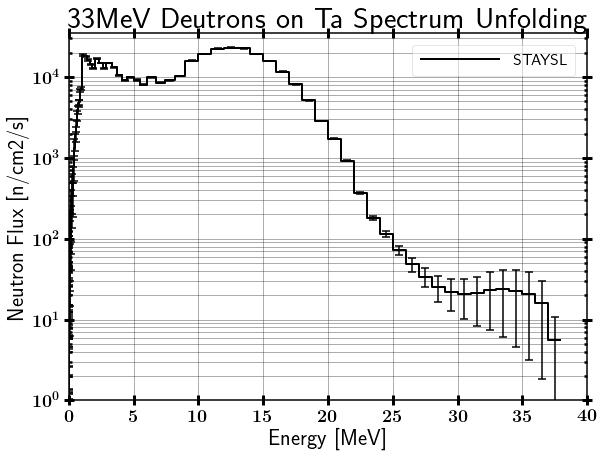

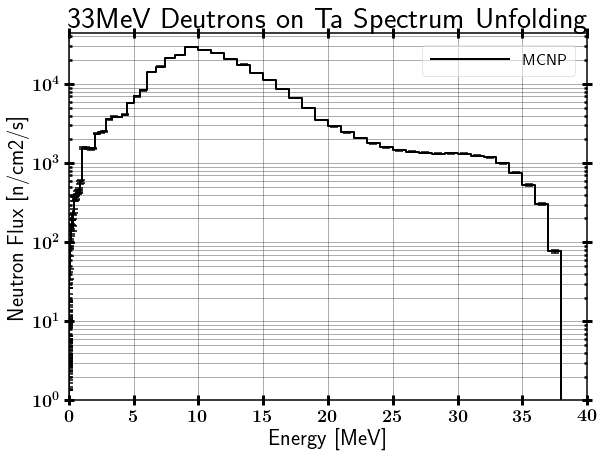

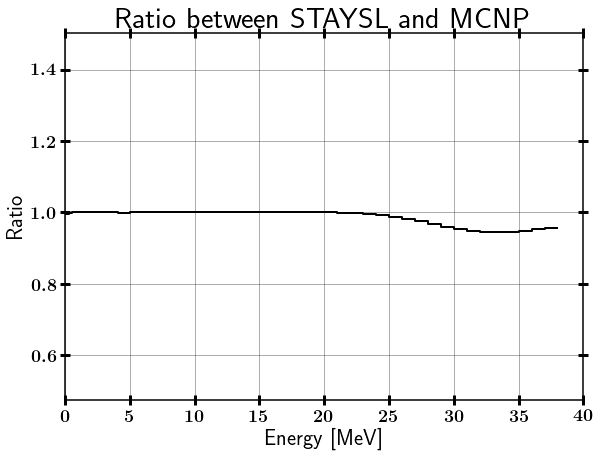

In [19]:
iter = 5

iterAdjHisto[iter].build_histo(iterSoln[iter]._df['lowE'].tolist(),iterSoln[iter]._df['adjFlux'].tolist(),
                             uncert=(iterSoln[iter]._df['adjStd']*iterSoln[iter]._df['adjFlux']).tolist(),
                             edgeLoc='low', name='STAYSL')

iterAdjHisto[iter].plot(xMin=1E-6, xMax=40, yMin=1, logX=False, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]',
              savePath=outpath+'33MeVTa_Staysl-Unfold_Itr{:1d}'.format(iter))

mcnpHisto.plot(xMin=1E-6, xMax=40, yMin=1, logX=False, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]')

iterRatioHisto[iter].build_histo(iterSoln[iter]._df['lowE'].tolist(), iterSoln[iter]._df['fluxRatio'].tolist(), edgeLoc='low')
iterRatioHisto[iter].plot(xMin=1E-6, xMax=40, logX=False, logY=False, includeMarkers=False,
              title='Ratio between STAYSL and MCNP', xLabel='Energy [MeV]', yLabel='Ratio',
              savePath=outpath+'33MeVTa_Staysl-MCNP-Ratio_Itr{:1d}'.format(iter))